In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq, fftshift
from IPython.display import display, Audio

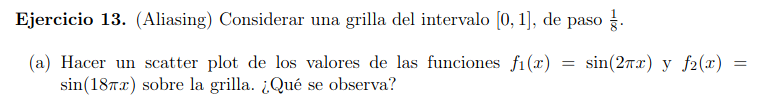

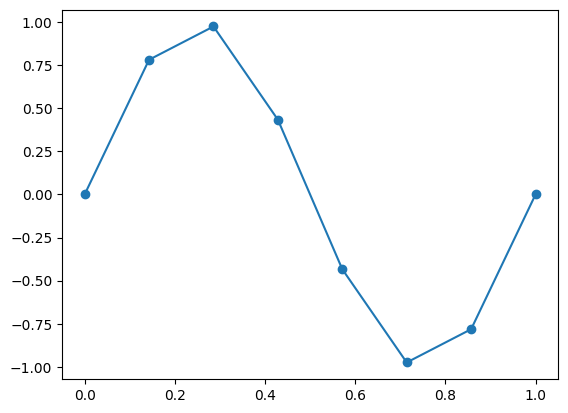

None


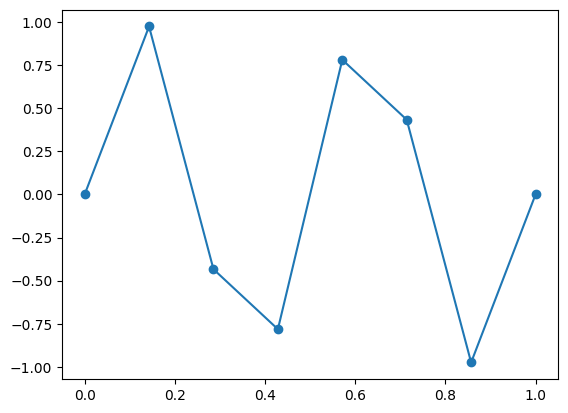

None


In [3]:
def f1(dur=1, Fs=8):
    t = np.linspace(0, dur, dur*abs(Fs))
    x = np.zeros(len(t))
    for i in range(len(t)):
      x[i] = np.sin(2*np.pi*t[i])
    return t, x

def f2(dur=1, Fs=8):
    t = np.linspace(0, dur, dur*abs(Fs))
    x = np.zeros(len(t))
    for i in range(len(t)):
      x[i] = np.sin(18*np.pi*t[i])
    return t, x

def graficar(t, x):
    plt.scatter(t, x)
    plt.plot(t, x)
    plt.show()
    return

print(graficar(f1()[0], f1()[1]))
print(graficar(f2()[0], f2()[1]))

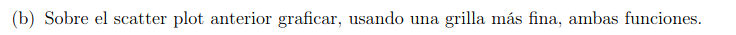

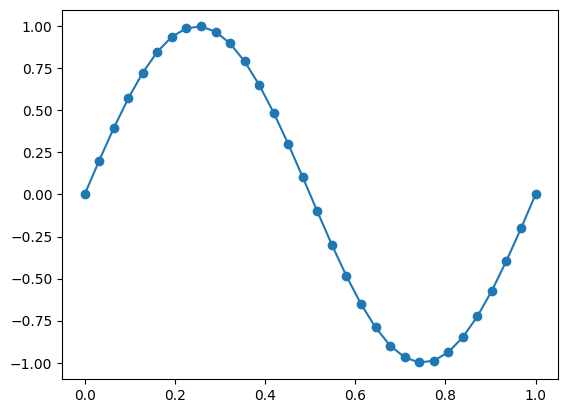

None


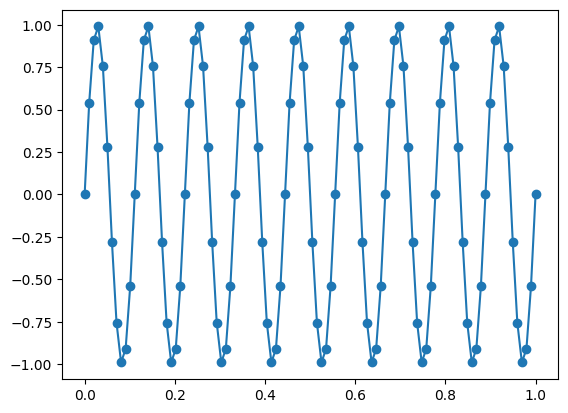

None


In [4]:
print(graficar(f1(1, 32)[0], f1(1, 32)[1]))
print(graficar(f2(1, 100)[0], f2(1, 100)[1]))

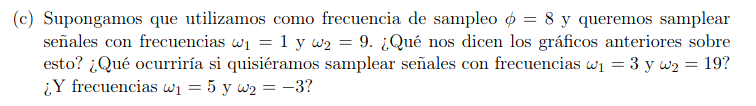

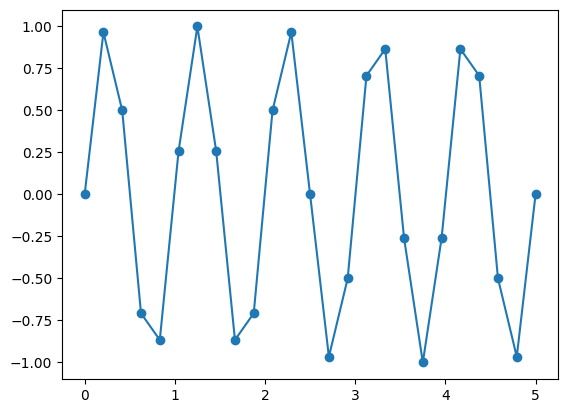

None


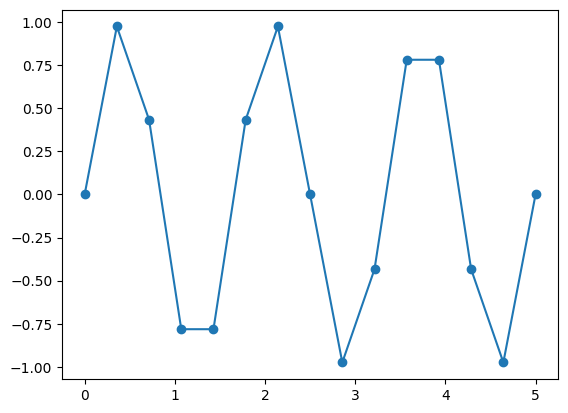

None


In [5]:
print(graficar(f1(5, 5)[0], f1(5, 5)[1]))
print(graficar(f2(5, -3)[0], f2(5, -3)[1]))

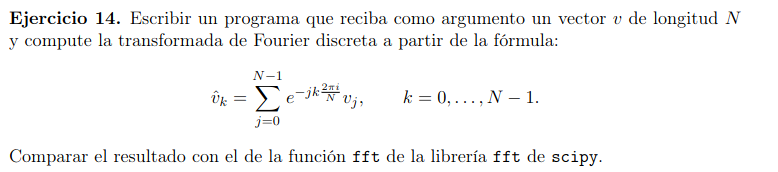

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


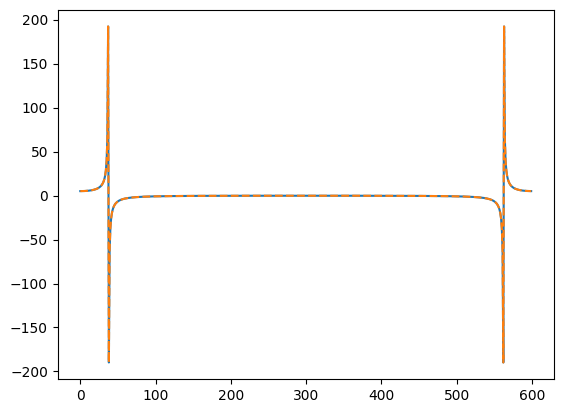

In [6]:
def fft_aManopla(N, v):
  transformada = np.zeros(N, dtype= complex)
  for i in range(N):
      for k in range(N):
          transformada[k] = transformada[k] + np.exp(k*i*2j*np.pi/N) * v[i]
  return transformada

N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

plt.plot(fft_aManopla(N, y))
plt.plot(yf, "--")
plt.show()

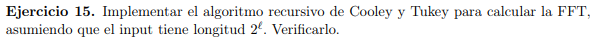

In [7]:
def cooley_tukey(P):
  #Algoritmo divide and conquer
    P = np.array(P, dtype=complex) #Acá tuve que pedir que los polinomios p sean leidos como números complejos
    n = len(P)  # es una potencia de 2
    if n == 1: #Caso base
        return P  # solo tengo un elemento
    #Caso recursivo
    w = np.exp(-2j * np.pi / n)  # quiero puntos equidistantes en la circunferencia unitaria de C
    P_pares = P[::2]
    P_impares = P[1::2]  # separo entre pares e impares
    ye = fft(P_pares)  # les hago fft a los pares
    yo = fft(P_impares)  # les hago fft a los impares

    # recupero la solucion
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = ye[j] + w**j * yo[j]
        y[j + n // 2] = ye[j] - w**j * yo[j]
    return y

# CONVOLUCIÓN

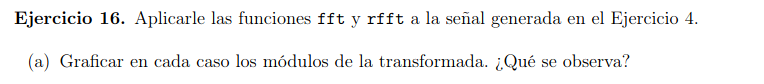

Acorde: LaM, Octava: 4, Frecuencia: 275.57646478908794 Hz


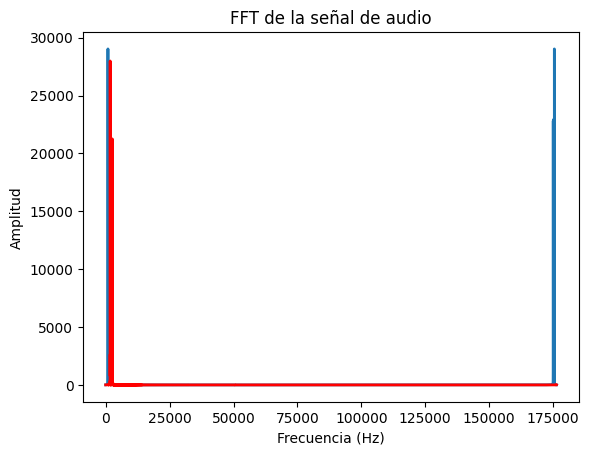

In [10]:
#Ejercicio 4

piano = np.zeros((8, 12))
frecuencia_actual = 16.35  # Frecuencia de la nota más baja (C0)
nombres = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

for i in range(8):
    for j in range(12):
        piano[i][j] = frecuencia_actual
        frecuencia_anterior = frecuencia_actual
        frecuencia_actual *= (2**(1/12))

        # Generar la señal sinusoidal para reproducir el sonido
        fs = 44100  # Frecuencia de muestreo
        duration = 1  # Duración de cada nota en segundos
        N = int(duration * fs)
        n = np.arange(N)
        x_original = np.cos(2 * np.pi * frecuencia_actual * n / fs)

        # Mostrar información y reproducir el sonido
        octava_actual = i  # El índice de la octava comienza en 0

la_mayor = (piano[3][9] + piano[4][1] + piano[4][4]) / 3

# Configurar parámetros de audio
fs = 44100  # Frecuencia de muestreo (generalmente se usa 44100 para audio)
duration = 4  # Duración de cada nota en segundos
N = int(duration * fs)
n = np.arange(N)

# Generar señal de audio
x_original = (
    np.cos(2 * np.pi * piano[3][9] * n / fs)
    + np.cos(2 * np.pi * piano[4][1] * n / fs)
    + np.cos(2 * np.pi * piano[4][4] * n / fs)
) / 3

# Ajustar la amplitud para ser audible
x_amplified = x_original

# Mostrar información y reproducir audio
print("Acorde: {}, Octava: {}, Frecuencia: {} Hz".format("LaM", 4, la_mayor))
display(Audio(data=x_amplified, rate=fs))

plt.plot(abs(fft(x_original)), linewidth=2) #FFT es compleja ==> tengo que hacerla real de alguna manera
plt.plot(abs(rfft(x_original)), linewidth=2, color="red")
plt.title("FFT de la señal de audio")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

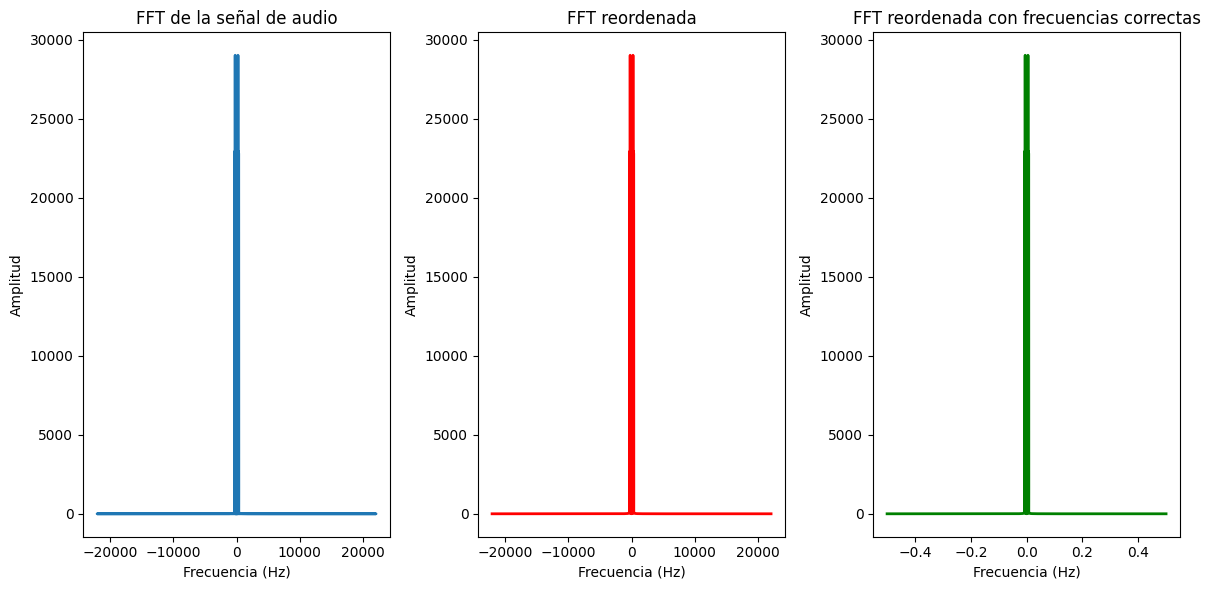

In [9]:
# Calcular la FFT de la señal de audio
X_fft = fft(x_original)

# Calcular las frecuencias correctas
freqs = fftfreq(N, 1/fs) #Le doy el tamaño y la frecuencia de muestreo y me da las frecuencias en los tiempos correctos

# Reordenar la FFT
X_fft_shifted = fftshift(X_fft) #Agarro el pedazo de los negativos para que me quede bien adelante
freqs_shifted = fftshift(freqs)

# Graficar la FFT original, la FFT reordenada y las frecuencias correctas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(freqs, np.abs(X_fft), linewidth=2)
plt.title("FFT de la señal de audio")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

plt.subplot(1, 3, 2)
plt.plot(freqs_shifted, np.abs(X_fft_shifted), linewidth=2, color="red")
plt.title("FFT reordenada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

plt.subplot(1, 3, 3)
plt.plot(fftshift(fftfreq(N)), np.abs(X_fft_shifted), linewidth=2, color="green")
plt.title("FFT reordenada con frecuencias correctas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()